In [1]:
import pandas as pd


data = pd.read_csv('test.csv')
data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.drop(columns=['Cabin'],inplace=True)
data.dropna(subset=['Fare'],inplace=True)

C:\Users\sridh\AppData\Local\Temp\ipykernel_12424\1729441531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)
C:\Users\sridh\AppData\Local\Temp\ipykernel_12424\1729441531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [5]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Embarked']=data['Embarked'].map({'C':0,'Q':1,'S':2})


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

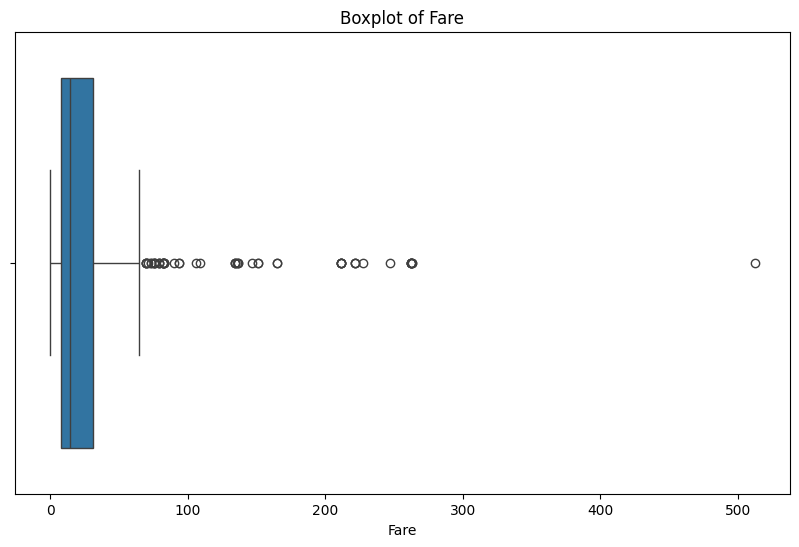


Summary statistics:
       PassengerId      Pclass         Sex         Age       SibSp  \
count   417.000000  417.000000  417.000000  417.000000  417.000000   
mean   1100.635492    2.263789    0.364508   29.525180    0.448441   
std     120.923774    0.842077    0.481870   12.628258    0.897568   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.000000    1.000000    0.000000   23.000000    0.000000   
50%    1101.000000    3.000000    0.000000   27.000000    0.000000   
75%    1205.000000    3.000000    1.000000   35.000000    1.000000   
max    1309.000000    3.000000    1.000000   76.000000    8.000000   

            Parch        Fare    Embarked  
count  417.000000  417.000000  417.000000  
mean     0.393285   35.024780    1.400480  
std      0.982419   51.973646    0.855019  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.500000    2.00000

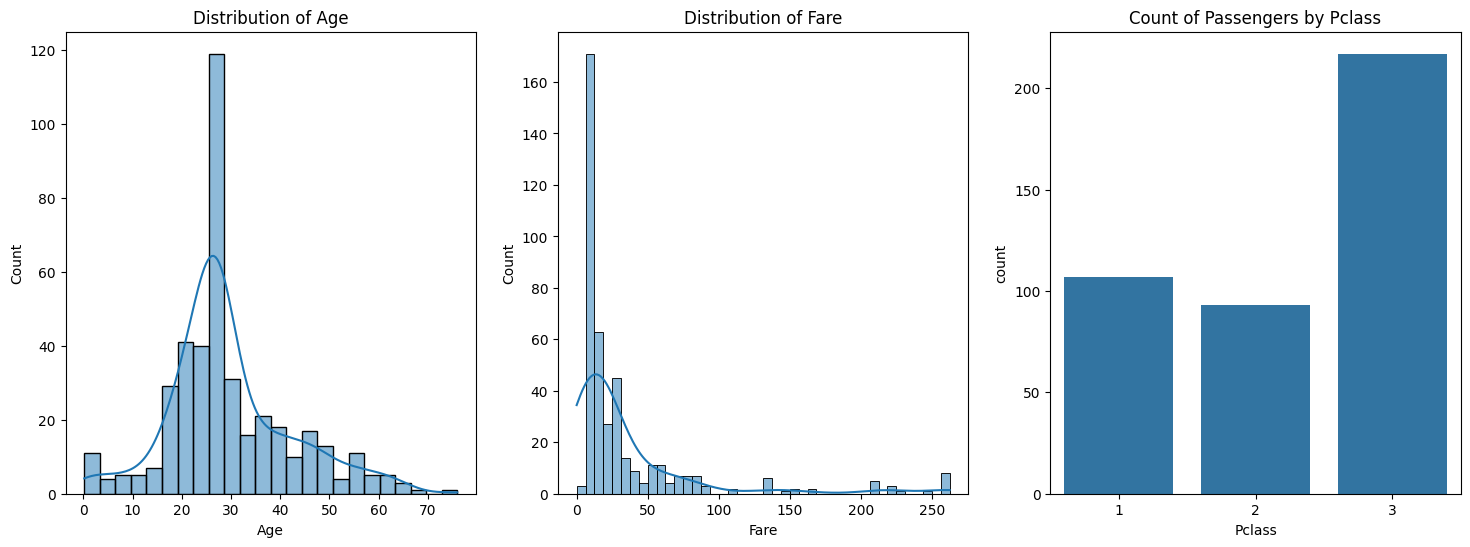

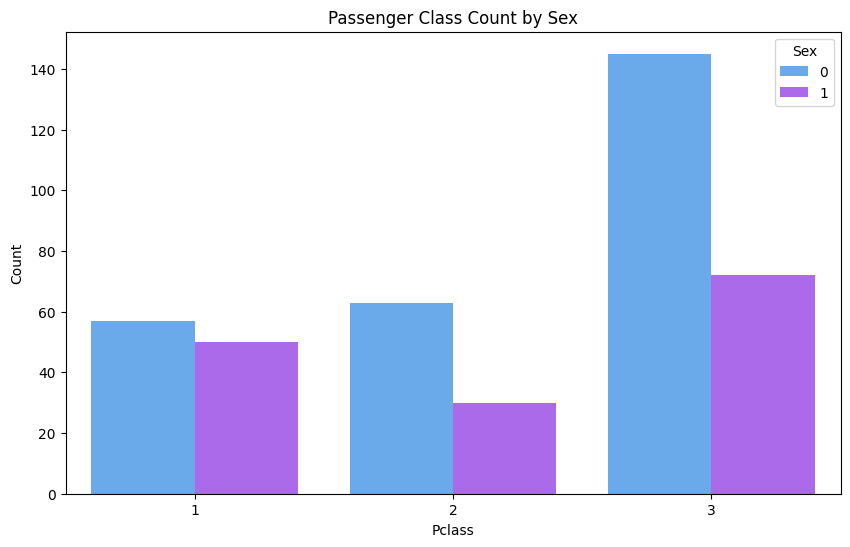

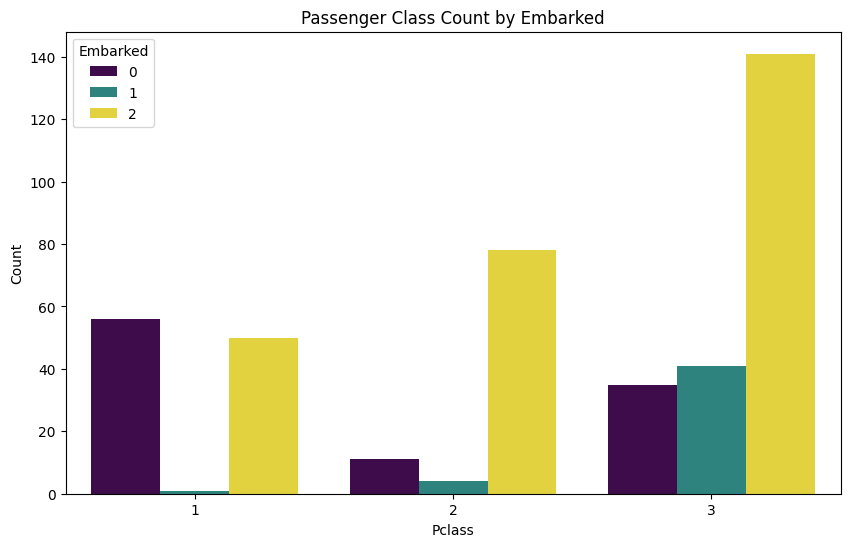

C:\Users\sridh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sridh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sridh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\sridh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

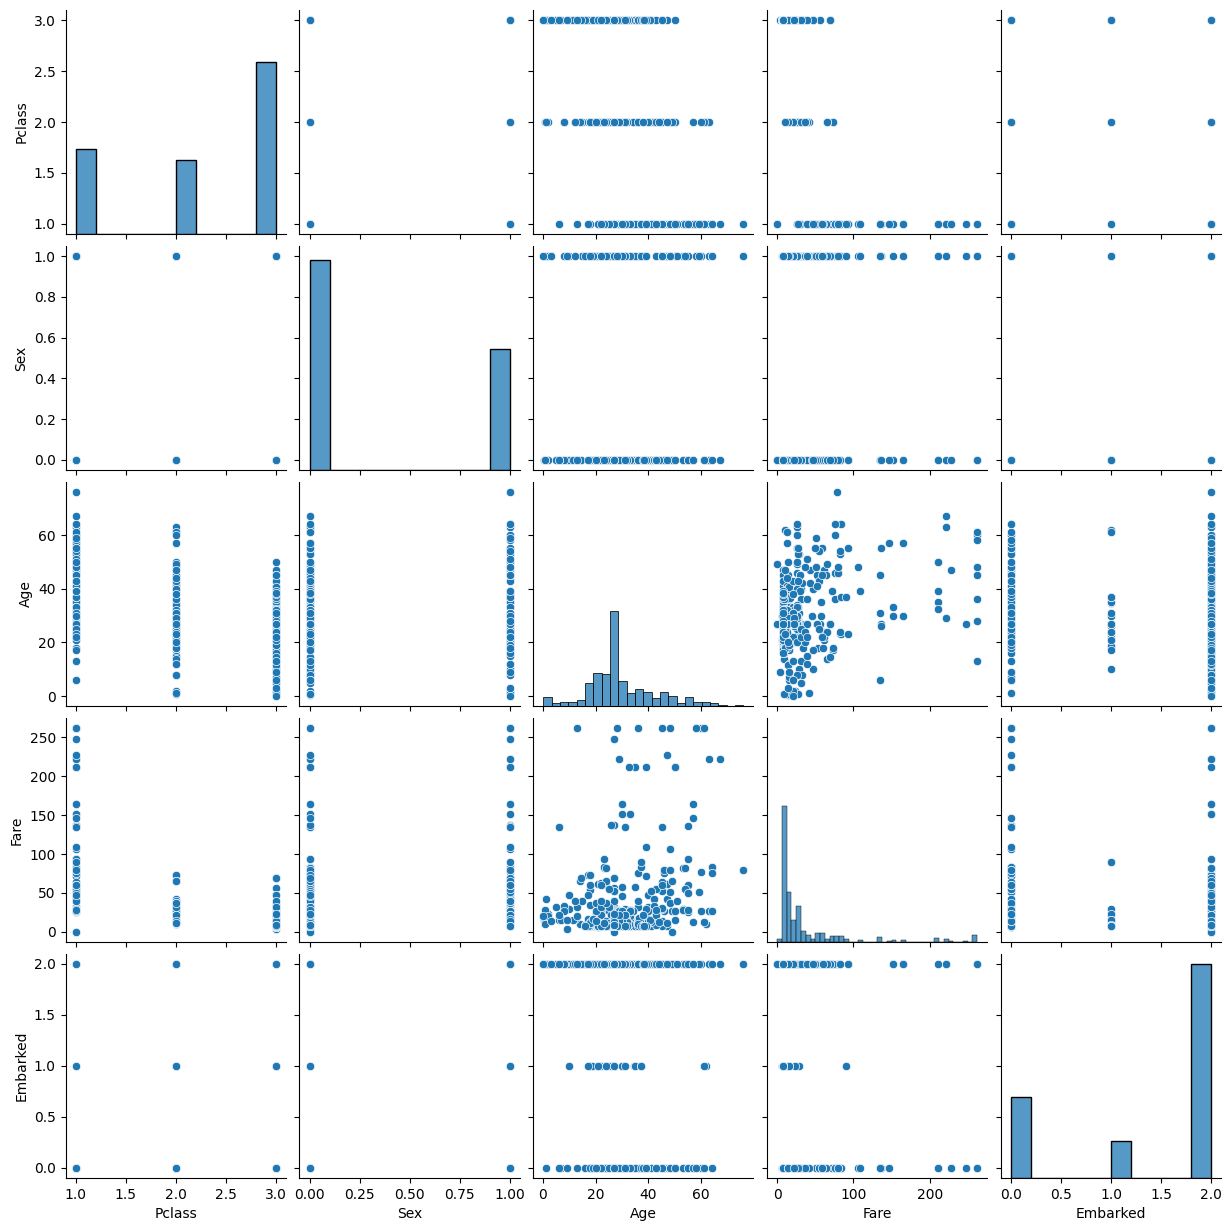

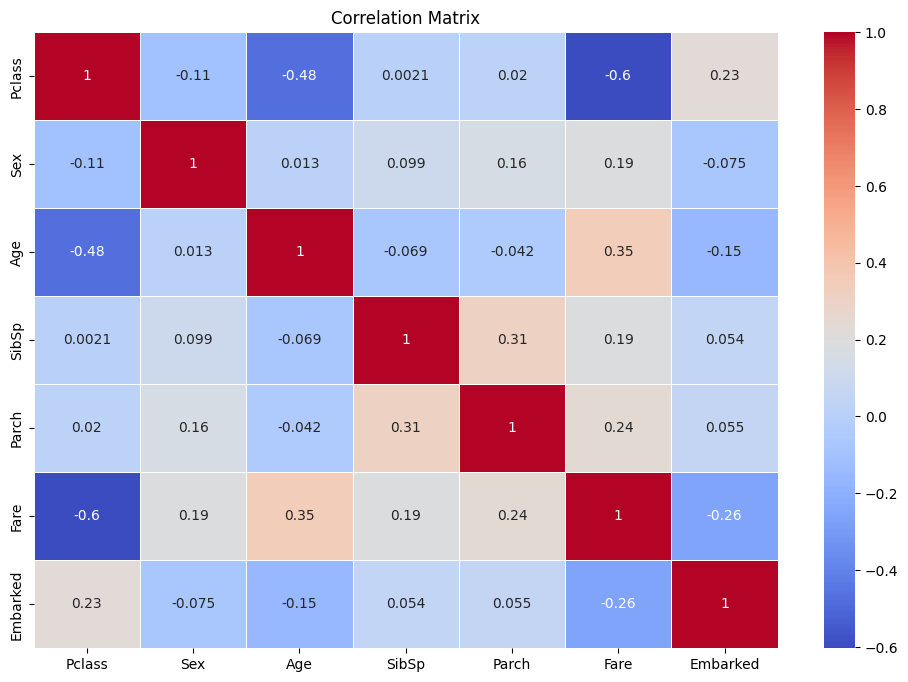

In [9]:
#TASK 2
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# Cap the maximum fare at the 99th percentile
data['Fare'] = data['Fare'].apply(lambda x: min(x, data['Fare'].quantile(0.99)))

# Exploratory Data Analysis (EDA)

# Summary statistics
summary_stats = data.describe()
print("\nSummary statistics:")
print(summary_stats)

# Univariate Analysis
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=data)
plt.title('Count of Passengers by Pclass')

plt.show()

# Bivariate Analysis

# Pclass vs Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=data, palette='cool')
plt.title('Passenger Class Count by Sex')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Pclass vs Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Embarked', data=data, palette='viridis')
plt.title('Passenger Class Count by Embarked')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Multivariate Analysis

# Pairplot to see relationships
sns.pairplot(data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']], palette='viridis')
plt.show()

# Visualization of Relationships and Trends

# Heatmap to see correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()